In [8]:


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=500, noise=0.30, random_state=42)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=42)


logclf=LogisticRegression()
rndclf=RandomForestClassifier()
svmclf=SVC(probability=True)

votingclf=VotingClassifier(
    estimators=[('lr',logclf),('rf',rndclf),('svc',svmclf)],
    voting='soft'
)
votingclf.fit(xtrain,ytrain)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True))],
                 voting='soft')

In [9]:
from sklearn.metrics import accuracy_score

for clf in (logclf,rndclf,svmclf,votingclf):
    clf.fit(xtrain,ytrain)
    ypred=clf.predict(xtest)
    print(clf.__class__.__name__,accuracy_score(ytest,ypred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.904


In [18]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagclf=BaggingClassifier(
    DecisionTreeClassifier(),n_estimators=500,
    max_samples=100,bootstrap=True,n_jobs=-1,oob_score=True
)
bagclf.fit(xtrain,ytrain)
ypred=bagclf.predict(xtest)

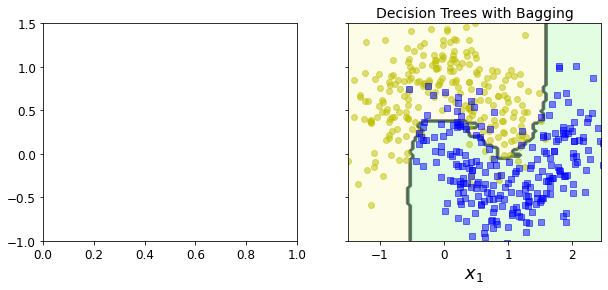

In [19]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

plt.sca(axes[1])
plot_decision_boundary(bagclf, x, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")

plt.show()

In [21]:
bagclf.oob_score_

0.9226666666666666

In [22]:
from sklearn.metrics import accuracy_score
ypred=bagclf.predict(xtest)
accuracy_score(ytest,ypred)

0.92

In [23]:
bagclf.oob_decision_function_

array([[0.32552083, 0.67447917],
       [0.38522427, 0.61477573],
       [1.        , 0.        ],
       [0.01025641, 0.98974359],
       [0.02933333, 0.97066667],
       [0.10282776, 0.89717224],
       [0.39493671, 0.60506329],
       [0.08077994, 0.91922006],
       [0.92370572, 0.07629428],
       [0.85974026, 0.14025974],
       [0.53225806, 0.46774194],
       [0.06970509, 0.93029491],
       [0.7408377 , 0.2591623 ],
       [0.86449864, 0.13550136],
       [0.91048593, 0.08951407],
       [0.06683805, 0.93316195],
       [0.03030303, 0.96969697],
       [0.9395466 , 0.0604534 ],
       [0.66753927, 0.33246073],
       [0.9625    , 0.0375    ],
       [0.04336735, 0.95663265],
       [0.26356589, 0.73643411],
       [0.82687339, 0.17312661],
       [0.98979592, 0.01020408],
       [0.96907216, 0.03092784],
       [0.00271003, 0.99728997],
       [0.94919786, 0.05080214],
       [0.99734748, 0.00265252],
       [0.01790281, 0.98209719],
       [0.75628141, 0.24371859],
       [0.

In [25]:
from sklearn.datasets import load_iris

iris=load_iris()

rndclf=RandomForestClassifier(n_estimators=500,n_jobs=-1)
rndclf.fit(iris["data"],iris["target"])

for name,score in zip(iris["feature_names"],rndclf.feature_importances_):
    print(name,':',score)

sepal length (cm) : 0.09368140505994979
sepal width (cm) : 0.02562619788377644
petal length (cm) : 0.4395631196262621
petal width (cm) : 0.4411292774300118


In [27]:
from sklearn.ensemble import AdaBoostClassifier

adaclf=AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),n_estimators=200,
    algorithm='SAMME.R',learning_rate=0.5
)
adaclf.fit(xtrain,ytrain)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [29]:
treereg1=DecisionTreeClassifier(max_depth=2)
treereg1.fit(x,y)

DecisionTreeClassifier(max_depth=2)

In [36]:
y2=y-treereg1.predict(x)
treereg2=DecisionTreeClassifier(max_depth=2)
treereg2.fit(x,y2)

DecisionTreeClassifier(max_depth=2)

In [37]:
y3=y2-treereg1.predict(x)
treereg3=DecisionTreeClassifier(max_depth=2)
treereg3.fit(x,y3)

DecisionTreeClassifier(max_depth=2)

In [46]:

ypred=sum(tree.predict(x)for tree in (treereg1,treereg2,treereg3)  )

In [47]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt=GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=1.0)
gbrt.fit(x,y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

In [48]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

xtrain,xval,ytrain,yval=train_test_split(x,y)

gbrt=GradientBoostingRegressor(max_depth=2,n_estimators=120)
gbrt.fit(xtrain,ytrain)

errors=[mean_squared_error(yval,ypred)
        for ypred in gbrt.staged_predict(xval)
       ]
bstnestimator=np.argmin(errors)+1

gbrtbest=GradientBoostingRegressor(max_depth=2,n_estimators=bstnestimator)
gbrtbest.fit(xtrain,ytrain)

GradientBoostingRegressor(max_depth=2)

In [49]:
gbrt=GradientBoostingRegressor(max_depth=2,warm_start=True)

minvalerror=float('inf')
errorgoingup=0

for nestimators in range (1,120):
    gbrt.nestimators=nestimators
    gbrt.fit(xtrain,ytrain)
    ypred=gbrt.predict(xval)
    valerror=mean_squared_error(yval,ypred)
    if valerror<minvalerror:
        minvalerror=valerror
        errorgoingup=0
    else:
        errorgoingup+=1
        if errorgoingup==5:
            break
    

ModuleNotFoundError: No module named 'xgboost'